# BBL536E DATA SCIENCE 
## HOMEWORK #1
---
Vefak Murat Akman


## Problem 1:
---
### Task 1:

Build predictive model using Ridge Regresssion.

Find optimal alpha parameter: 0.001, 0.01, 0.1, 1.0, 10.0

Calculate Mean Absolute Error and Mean Squared Errors by using 10-fold 10 repetition. 

Calculate mean score and the standart deviation. 

### Import Libraries
---

In [1]:
#Import Libraries
import pandas as pd
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score,RepeatedKFold,GridSearchCV
import numpy as np
import matplotlib as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

### Preparing & Exploring Data
---
This data about energy analysis using 12 different building shapes.

X1-to-X8 features about building. y1 and y2 are outcomes. All features are numeric.
> **Specifically**: 
    - X1 Relative Compactness
    - X2 Surface Area 
    - X3 Wall Area 
    - X4 Roof Area 
    - X5 Overall Height 
    - X6 Orientation 
    - X7 Glazing Area 
    - X8 Glazing Area Distribution 
    - Y1 Heating Load 
    - Y2 Cooling Load

In [2]:
data = pd.read_excel("ENB2012_data.xlsx")
print("Length of data= ",len(data))
data.head()

Length of data=  768


,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [3]:
data.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307195,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090204,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000,22.080000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000,48.030000


In [4]:
# Split Data
X = data.iloc[:, 0:8].values
y1 = data.iloc[:, 8].values
y2 = data.iloc[:, 9].values

### Ridge Regression
---


GridSearchCV is used for Task 1. This function can perform finding best alpha value using iteration. 

`best_params_`: Returns optimal alpha.

`best_score_` : Returns optimal alpha's mean error(MAE or MSE for each cross validations.

`cv_results_` : Returns results of gridSearchCV. 

`cv_results_[std_test_score]`: Returns std of each alpha parameter.



In [5]:
def findOptimalRidgeAlpha(x_data,y_data,parameters,scoring,cv):
    """train_test_splitmodel
    Arguments:
        x_data = Features
        y_data = Results (Labels)
        parameters = alpha values
        scoring = Scoring method 
        cv = Cross validation method
    Return:
        best_params_
        best_score_
        cv_results_
    """
    ridge_model = Ridge()
    ridgeRegressor = GridSearchCV(ridge_model,parameters,scoring=scoring,cv=cv)
    ridgeRegressor.fit(x_data,y_data)
    return ridgeRegressor.best_params_,ridgeRegressor.best_score_ , ridgeRegressor.cv_results_, ridgeRegressor.best_index_

#Create reapeted Kfold object with 10 repeats & 10 splits & random_state
rkf = RepeatedKFold(n_splits=10, n_repeats=10, random_state =True)
#Parameters
parameters = {'alpha': [0.001, 0.01, 0.1, 1.0, 10.0]}

### Y1 Results:
---

In [6]:
#Optimal parameter for mean_sqauared_error
best_alpha_mse,best_scr_mse,results_mse,idx = findOptimalRidgeAlpha(X,y1,parameters,"neg_mean_squared_error",rkf)
print("Mean Squared Error: ")
print("   Optimal Alpha= {}".format(best_alpha_mse))
print("   Mean of Mean Squared Error= {}".format(best_scr_mse*-1))
print("   Std of Mean Squared Error= {}\n".format(results_mse["std_test_score"][idx]))
print("**************************************************\n")
#Optimal parameter for mean_abosule_error
best_alpha_mae,best_scr_mae,results_mae, idx = findOptimalRidgeAlpha(X,y1,parameters,"neg_mean_absolute_error",rkf)
print("Mean Absolute Error:")
print("   Optimal Alpha= {}".format(best_alpha_mae))
print("   Mean of Mean Absolute Error= {}".format(best_scr_mae*-1))
print("   Std of Mean Absolute Error= {}".format(results_mae["std_test_score"][idx]))


Mean Squared Error: 
   Optimal Alpha= {'alpha': 0.001}
   Mean of Mean Squared Error= 8.710823249413734
   Std of Mean Squared Error= 1.741343448207238

**************************************************

Mean Absolute Error:
   Optimal Alpha= {'alpha': 0.001}
   Mean of Mean Absolute Error= 2.091051803691356
   Std of Mean Absolute Error= 0.23614822382853615


### Y2 Results: 
---

In [7]:
#Optimal parameter for mean_sqauared_error
best_alpha_mse,best_scr_mse,results_mse,idx = findOptimalRidgeAlpha(X,y2,parameters,"neg_mean_squared_error",rkf)
print("Mean Squared Error: ")
print("   Optimal Alpha= {}".format(best_alpha_mse))
print("   Mean of Mean Squared Error= {}".format(best_scr_mse*-1))
print("   Std of Mean Squared Error= {}\n".format(results_mse["std_test_score"][idx]))
print("**************************************************\n")
#Optimal parameter train_test_splitmodelfor mean_abosule_error
best_alpha_mae,best_scr_mae,results_mae,idx = findOptimalRidgeAlpha(X,y2,parameters,"neg_mean_absolute_error",rkf)
print("Mean Absolute Error:")
print("   Optimal Alpha= {}".format(best_alpha_mae))
print("   Mean of Mean Squared Error= {}".format(best_scr_mae*-1))
print("   Std of Mean Squared Error= {}".format(results_mae["std_test_score"][idx]))

Mean Squared Error: 
   Optimal Alpha= {'alpha': 0.001}
   Mean of Mean Squared Error= 10.353927888203641
   Std of Mean Squared Error= 2.531010179953843

**************************************************

Mean Absolute Error:
   Optimal Alpha= {'alpha': 0.01}
   Mean of Mean Squared Error= 2.2662493683653646
   Std of Mean Squared Error= 0.2698513327435211


#### Double check for results. 
In the below I tested the alpha=0.001 with same cv and scoring.

The results are same. I would say that the proposed method is correct. 

Comment / Uncomment the lines to test other result.

In [8]:
model = Ridge(alpha=0.01)
scoring = 'neg_mean_absolute_error'
#scoring = 'neg_mean_squared_error'
#results = cross_val_score(model, X, y1, cv=rkf, scoring=scoring)
results = cross_val_score(model, X, y2, cv=rkf, scoring=scoring)
print(results.mean(axis=0)*-1)
print(results.std(axis=0))

2.2662493683653646
0.2698513327435211


## Problem 1:
---
## Task 2:

Use gridsearch to find optimal parameters 

Calculate Mean Absoulute Error and Mean Squared Error 

Find mean and std of them

*The data is already provided. There is no need to call them again. 



### Random Forest Regression 

### Import Libraries

In [9]:
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

### Define Parameters & Cross Validation Method

In [10]:
# RandomForest Parameters
n_estimators = (10, 50, 100, 250, 500)
max_depth = [50,150,250]
min_samples_split = [2, 3]
min_samples_leaf = [1, 2, 3]

params_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf
              }
#Kfold
rkf = RepeatedKFold(n_splits=10, n_repeats=10, random_state =True)
print(params_grid)

{'n_estimators': (10, 50, 100, 250, 500), 'max_depth': [50, 150, 250], 'min_samples_split': [2, 3], 'min_samples_leaf': [1, 2, 3]}


### Define Random Forest Regressor Function and Grid Search Function to Find Parameters 

In [11]:
#Grid Search 
def gridSearchRFR(x_data,y_data,param_grid,scoring,cv):
    grid_model = GridSearchCV(
                estimator=RandomForestRegressor(),
                param_grid=param_grid,
                cv=cv, scoring=scoring, verbose=2, n_jobs=-1)
    results=grid_model.fit(x_data,y_data)
    return results
#Random Forest Regressor
def RandomForestReg(x_data,y_data,best_params,scoring,cv):
    rfr = RandomForestRegressor(max_depth=best_params["max_depth"], 
                                    n_estimators=best_params["n_estimators"],
                                    min_samples_split=best_params["min_samples_split"],
                                    min_samples_leaf=best_params["min_samples_leaf"],
                                    random_state=True, verbose=1)
    scores = cross_val_score(rfr, x_data, y_data, scoring=scoring,  cv=cv)
    return scores
    

### Y1 Results:
---

In [12]:
#Finding best parameters for Y1 with neg_mean_squared_error
y1_param_sqr = gridSearchRFR(X,y1,params_grid,scoring="neg_mean_squared_error",cv=rkf)


Fitting 100 folds for each of 90 candidates, totalling 9000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 330 tasks      | elapsed:   10.3s
[Parallel(n_jobs=-1)]: Done 534 tasks      | elapsed:   34.9s
[Parallel(n_jobs=-1)]: Done 1024 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 1748 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 2458 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 3401 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 4376 tasks      | elapsed:  4.8min
[Parallel(n_jobs=-1)]: Done 5481 tasks      | elapsed:  6.2min
[Parallel(n_jobs=-1)]: Done 6826 tasks      | elapsed:  7.5min
[Parallel(n_jobs=-1)]: Done 8244 tasks      | elapsed:  9.2min
[Parallel(n_jobs=-1)]: Done 9000 out of 9000 | elapsed: 10.2min finished


In [13]:
#Calculate scores
y1_best_sqr = y1_param_sqr.best_params_
y1_scores_sqr = RandomForestReg(X,y1,y1_best_sqr,scoring="neg_mean_squared_error",cv=rkf)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_j

[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Us

[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Us

[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Us

In [14]:
#Finding best parameters for Y1 with neg_mean_absolute_error
y1_param_abs = gridSearchRFR(X,y1,params_grid,scoring="neg_mean_absolute_error",cv=rkf)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 100 folds for each of 90 candidates, totalling 9000 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.2s
/home/vefak/.local/lib/python3.6/site-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   24.6s
[Parallel(n_jobs=-1)]: Done 845 tasks      | elapsed:   47.6s
[Parallel(n_jobs=-1)]: Done 1336 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 1909 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 2590 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 3457 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 4408 tasks      | elapsed:  5.3min
[Parallel(n_jobs=-1)]: Done 5489 tasks      | elapsed:  6.9min
[Parallel(n_jobs=-1)]: Done 6672 tasks      | elapsed:  8.2min
[Parallel(n_jobs=-1)]: Done 8030 tasks      | elapsed: 10.0min
[Parallel(n_jobs=-1)]: Don

In [15]:
y1_best_abs = y1_param_abs.best_params_
y1_scores_abs = RandomForestReg(X,y1,y1_best_abs,scoring="neg_mean_absolute_error",cv=rkf)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_j

[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Us

[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Us

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_j

In [25]:
print("Mean Squared Error: ")
print("   Best Params = {}".format(y1_best_sqr))
print("   Mean of Mean Squared Error = {}".format(y1_scores_sqr.mean()*-1))
print("   Std of Mean Squared Error = {}\n".format(y1_scores_sqr.std()))


print("**************************************************\n")
#Optimal parameter train_test_splitmodelfor mean_abosule_error
print("Mean Absolute Error:")
print("   Best Params = {}".format(y1_best_abs))
print("   Mean of Mean Absolute Error= {}".format(y1_scores_abs.mean()*-1))
print("   Std of Mean Absolute Error= {}".format(y1_scores_abs.std()))

Mean Squared Error: 
   Best Params = {'max_depth': 50, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 500}
   Mean of Mean Squared Error = 0.21180400121252435
   Std of Mean Squared Error = 0.05777795987166702

**************************************************

Mean Absolute Error:
   Best Params = {'max_depth': 50, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 500}
   Mean of Mean Absolute Error= 0.3089992711756658
   Std of Mean Absolute Error= 0.03856067170100764


### Y2 Results:
---

In [17]:
#Finding best parameters for Y2 with neg_mean_squared_error
y2_param_sqr = gridSearchRFR(X,y2,params_grid,scoring="neg_mean_squared_error",cv=rkf)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 100 folds for each of 90 candidates, totalling 9000 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.2s
/home/vefak/.local/lib/python3.6/site-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   24.3s
[Parallel(n_jobs=-1)]: Done 845 tasks      | elapsed:   47.3s
[Parallel(n_jobs=-1)]: Done 1336 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 1885 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 2522 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 3441 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 4392 tasks      | elapsed:  5.0min
[Parallel(n_jobs=-1)]: Done 5497 tasks      | elapsed:  6.5min
[Parallel(n_jobs=-1)]: Done 6842 tasks      | elapsed:  7.9min
[Parallel(n_jobs=-1)]: Done 8302 tasks      | elapsed:  9.6min
[Parallel(n_jobs=-1)]: Don

In [18]:
#Calculate scores
y2_best_sqr = y2_param_sqr.best_params_
y2_scores_sqr = RandomForestReg(X,y2,y2_best_sqr,scoring="neg_mean_squared_error",cv=rkf)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_j

[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Us

[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Us

[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Us

In [19]:
#Finding best parameters for Y2 with neg_mean_absolute_error
y2_param_abs = gridSearchRFR(X,y2,params_grid,scoring="neg_mean_absolute_error",cv=rkf)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 100 folds for each of 90 candidates, totalling 9000 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 354 tasks      | elapsed:   12.7s
[Parallel(n_jobs=-1)]: Done 576 tasks      | elapsed:   39.0s
[Parallel(n_jobs=-1)]: Done 1024 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 1652 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 2434 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 3353 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 4376 tasks      | elapsed:  4.9min
[Parallel(n_jobs=-1)]: Done 5481 tasks      | elapsed:  6.3min
[Parallel(n_jobs=-1)]: Done 6850 tasks      | elapsed:  7.7min
[Parallel(n_jobs=-1)]: Done 8244 tasks      | elapsed:  9.3min
[Parallel(n_jobs=-1)]: Done 9000 out of 9000 | elapsed: 10.4min finished


In [20]:
#Calculate scores
y2_best_abs = y2_param_abs.best_params_
y2_scores_abs = RandomForestReg(X,y2,y2_best_abs,scoring="neg_mean_absolute_error",cv=rkf)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_j

[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Us

[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Us

[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Us

In [24]:
print("Mean Squared Error: ")
print("   Best Params = {}".format(y2_best_sqr))
print("   Mean of Mean Squared Error= {}".format(y2_scores_sqr.mean()*-1))
print("   Std of Mean Squared Error= {}\n".format(y2_scores_sqr.std()))


print("**************************************************\n")
#Optimal parameter train_test_splitmodelfor mean_abosule_error
print("Mean Absolute Error:")
print("   Best Params = {}".format(y2_best_abs))
print("   Mean of Mean Absolute Error = {}".format(y2_scores_abs.mean()*-1))
print("   Std of Mean Absolute Error = {}".format(y2_scores_abs.std()))

Mean Squared Error: 
   Best Params = {'max_depth': 50, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 500}
   Mean of Mean Squared Error= 2.6160599471798007
   Std of Mean Squared Error= 0.6783934618447423

**************************************************

Mean Absolute Error:
   Best Params = {'max_depth': 50, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 500}
   Mean of Mean Absolute Error = 0.9886249311004798
   Std of Mean Absolute Error = 0.14866769814859332


---
---
---

## Problem 2:
---
### Task 1:

Define 20 C paramaters in range of 0.0001 and 10000
Define Logistics Regression model
RepeatedKFold 5 fold cross 5 repeated 
Calculate mean AUC score

---

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


dataset = pd.read_csv('bank-additional-full.csv', sep=";")

# Print some of categorical variables
print('Jobs:\n', dataset['job'].unique())
print('Marital:\n', dataset['marital'].unique())
print('Default:\n', dataset['default'].unique())
print('Housing:\n', dataset['housing'].unique())
print('Loan:\n', dataset['loan'].unique())


Jobs:
 ['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']
Marital:
 ['married' 'single' 'divorced' 'unknown']
Default:
 ['no' 'unknown' 'yes']
Housing:
 ['no' 'yes' 'unknown']
Loan:
 ['no' 'yes' 'unknown']


In [31]:
dataset.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [34]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

### Checking null variables

In [36]:
print('Null Values: ', dataset.isnull().any())

Null Values:  age               False
job               False
marital           False
education         False
default           False
housing           False
loan              False
contact           False
month             False
day_of_week       False
duration          False
campaign          False
pdays             False
previous          False
poutcome          False
emp.var.rate      False
cons.price.idx    False
cons.conf.idx     False
euribor3m         False
nr.employed       False
y                 False
dtype: bool


### Data Preprocessing


In [40]:
# Convert Categorical values to Numerics
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
categorilcals = ['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome','y']
for word in (categorilcals):
    dataset[word]      = labelencoder.fit_transform(dataset[word]) 
    
X = dataset.iloc[:, :20].values
y = dataset.iloc[:, -1].values

#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)   


### Logistic Regression Training

In [41]:
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

#Define Cross Val method
rkf = RepeatedKFold(n_splits=5, n_repeats=5, random_state =True)
#Define C parameters 
params=np.array([0.0001,0.0005,0.001,0.002,0.005,0.01,0.05,0.1,0.5,0.75,1.0,5.0,10.0,50.0,100.0,500.0,1000.0,5000.0,7500.0,10000.0])
#Using GridSearhCV again
#Using roc_auc as scoring method. In sklearn, AUC scoring is defined as roc_auc

lr = LogisticRegression()
parameters = {'C': params}
clf = GridSearchCV(lr, parameters, scoring='roc_auc', cv = rkf,n_jobs=-1)
clf.fit(X, y)
result_mean = clf.cv_results_["mean_test_score"]

print("Best parameter = ",clf.best_params_)
print("Best score = ",clf.best_score_)


Best parameter =  {'C': 10000.0}
Best score =  0.9297004662063947


### Plotting Curve

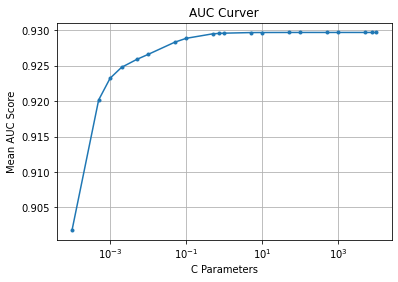

In [49]:
from matplotlib.ticker import NullFormatter  # useful for `logit` scale

plt.plot(params, result_mean,marker='.', label='Logistic')


plt.xscale('log')
plt.title('AUC Curver')
plt.xlabel('C Parameters')
plt.ylabel('Mean AUC Score')
plt.grid(True)


### Task 2
---
Build a Random Forest model.

Using gridsearch try to find the best score and combination of the following 

**Hyperparameters: **

`Number of estimators`: 10,50,100,250,500,1000 

`max_depth`: 50,150,250

`min_samples_split`: 2,3

`min_samples_leaf`: 1,2,3

### Random Forest Model
---

In [ ]:
# RandomForest Parameters
n_estimators = (10, 50, 100, 250, 500,1000)
max_depth = [50,150,250]
min_samples_split = [2, 3]
min_samples_leaf = [1, 2, 3]

params_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf
              }
#Kfold
rkf = RepeatedKFold(n_splits=3, n_repeats=3, random_state =True)
print(params_grid)

# I already defined functions for Random Forest
#Call two function. First one finds best params
#Second one: Calculates score
params_out = gridSearchRFR(X,y,params_grid,scoring="roc_auc",cv=rkf)
best_param = params_out.best_params_
scores = RandomForestReg(X,y,best_param,scoring="roc_auc",cv=rkf)

    

{'n_estimators': (10, 50, 100, 250, 500, 1000), 'max_depth': [50, 150, 250], 'min_samples_split': [2, 3], 'min_samples_leaf': [1, 2, 3]}
Fitting 9 folds for each of 108 candidates, totalling 972 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


In [ ]:
print("   Best Params = {}".format(best_param))
print("   Mean of Mean Absolute Error = {}".format(scores.mean()*-1))
print("   Std of Mean Absolute Error = {}".format(scores.std()))